In [ ]:
#pip install qiskit

In [ ]:
#pip install qiskit-aer

In [ ]:
#pip install pylatexenc

In [ ]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, visualize_transition, plot_histogram, array_to_latex

In [ ]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
# Create quantum circuit with 2 qubits.
# The default initial state of each qubit is |0> or [1, 0].
constant_oracle = QuantumCircuit(2)

In [ ]:
output = np.random.randint(2) # Random number: 0 or 1.

if output == 1:
  constant_oracle.x(1) # Apply X gate to the 2nd input.

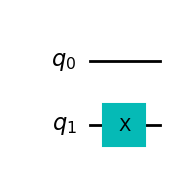

In [ ]:
constant_oracle.draw('mpl')

In [ ]:
# Initialize the input qubits to |+>.
# Initialize the output qubit to |->.
dj_circuit = QuantumCircuit(2, 1)


In [ ]:
dj_circuit.h(0) # Apply Hadamard gate to the first qubit.

# Put qubits in state |->
dj_circuit.x(1) # Apply Hadamard gate to the second qubit.
dj_circuit.h(1) # Apply X gate.

In [ ]:
dj_circuit = dj_circuit & constant_oracle

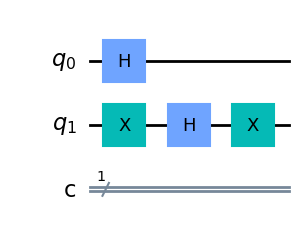

In [ ]:
dj_circuit.draw('mpl')

In [ ]:
backend = Aer.get_backend('unitary_simulator')

In [ ]:
out = execute(dj_circuit, backend).result().get_unitary()
array_to_latex(out, prefix = "\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In [ ]:
backend = Aer.get_backend('statevector_simulator')

In [ ]:
out = execute(dj_circuit, backend).result().get_statevector()
array_to_latex(out, prefix = "\\text{State Vector = }\n")

<IPython.core.display.Latex object>

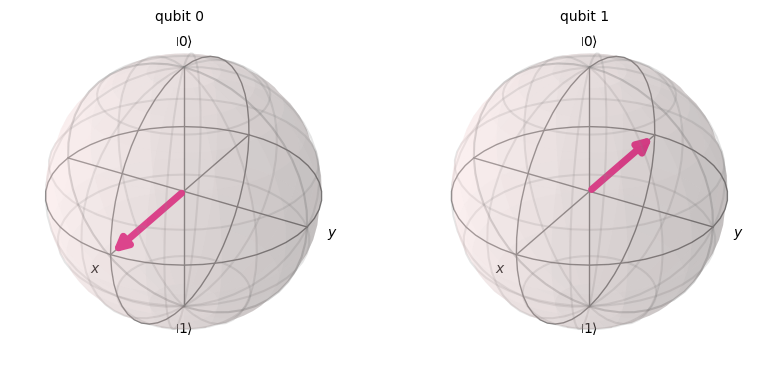

In [ ]:
plot_bloch_multivector(out)

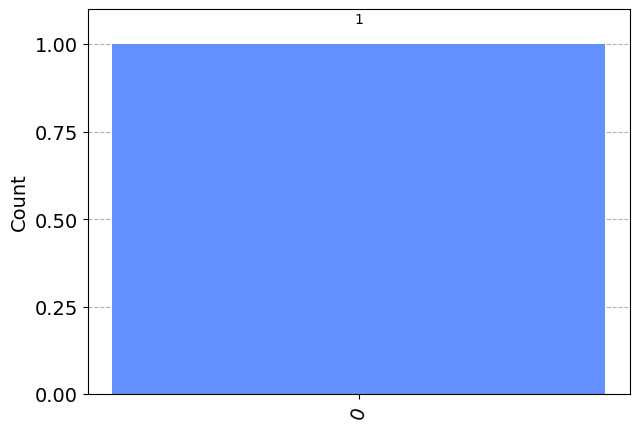

In [ ]:
counts = execute(dj_circuit, backend).result().get_counts()
plot_histogram(counts)